In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
X_train = np.load('X_kannada_MNIST_train.npz')['arr_0']
Y_train = np.load('y_kannada_MNIST_train.npz')['arr_0']
X_test = np.load('X_kannada_MNIST_test.npz')['arr_0']
Y_test = np.load('y_kannada_MNIST_test.npz')['arr_0']

In [5]:
X_train_reshape = X_train.reshape(X_train.shape[0], 784)
X_test_reshape = X_test.reshape(X_test.shape[0], 784)
x_train = pd.DataFrame(X_train_reshape)
x_test = pd.DataFrame(X_test_reshape)
y_train = pd.DataFrame(Y_train,columns=['target'])
y_test = pd.DataFrame(Y_test,columns=['target'])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score,recall_score,confusion_matrix, roc_curve,auc 
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
def knn(x_train,y_train,x_test,y_test,n):
    
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    
    mm = MinMaxScaler()
    mm.fit(x_train)
    x_train = mm.transform(x_train)
    x_train = pd.DataFrame(x_train)
    x_test = mm.transform(x_test)
    x_test = pd.DataFrame(x_test)
    
    
    skf = StratifiedKFold(n_splits = 5)
    knn = KNeighborsClassifier() 
    
    
    params_knn ={'n_neighbors': range(0,10),
             'weights': ['uniform','distance'],
             'metric':['manhattan','euclidean','cosine'],}
    
    rcv = RandomizedSearchCV(knn, param_distributions=params_knn,cv=skf,scoring = 'accuracy')
    rcv.fit(x_train,y_train)
    
    final_model = knn.set_params(**rcv.best_params_)
    final_model.fit(x_train,y_train)
    
    preds= final_model.predict(x_test)
    preds = pd.DataFrame(preds)
    proba= final_model.predict_proba(x_test)
    
    return preds,rcv.best_params_,rcv.best_score_,proba

In [16]:
def decision_tree(x_train,y_train,x_test,y_test,n):
    
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    
    
    
    skf = StratifiedKFold(n_splits = 10)
    dtc = DecisionTreeClassifier()
    
    params_dtc ={'criterion':['gini', 'entropy', 'log_loss'],
         'splitter':['best'],
         'max_depth':range(3,8),
         'min_samples_split':[2,3,4,5],
         'min_weight_fraction_leaf':np.linspace(0,0.1, 10),
         'max_features':[None, 'sqrt', 'log2', 0.5],
         'ccp_alpha':[0.001,0.005,0.01,0.05]}
    
    rcv = RandomizedSearchCV(dtc, param_distributions=params_dtc,cv=skf,scoring = 'accuracy')
    rcv.fit(x_train,y_train)
    final_model = dtc.set_params(**rcv.best_params_)
    final_model.fit(x_train,y_train)
    
    preds= final_model.predict(x_test)
    preds = pd.DataFrame(preds)
    proba= final_model.predict_proba(x_test)
    
    return preds,rcv.best_params_,rcv.best_score_,proba

In [7]:
def svm(x_train,y_train,x_test,y_test,n):
    
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    
    mm = MinMaxScaler()
    mm.fit(x_train)
    x_train = mm.transform(x_train)
    x_train = pd.DataFrame(x_train)
    x_test = mm.transform(x_test)
    x_test = pd.DataFrame(x_test)
    
    
    
    skf = StratifiedKFold(n_splits = 5)
    svc = SVC(probability=True)
    
    params_svc ={'C': range(1,5,2),
             'kernel':['linear']}
    
    rcv = RandomizedSearchCV(svc,param_distributions=params_svc,cv=skf,scoring='accuracy' )
    rcv.fit(x_train,y_train)
    
    final_model = svc.set_params(**rcv.best_params_)
    final_model.fit(x_train,y_train)
    
    preds= final_model.predict(x_test)
    preds = pd.DataFrame(preds)
    proba= final_model.predict_proba(x_test)
    
    return preds,rcv.best_params_,rcv.best_score_,proba

In [8]:
def random_forest(x_train,y_train,x_test,y_test,n):
    
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    
    
    
    skf = StratifiedKFold(n_splits = 5)
    rfc =  RandomForestClassifier()
    
    params = {'criterion':['gini','entropy'],
          'n_estimators': range(1,10),
          'max_features':[None, 'sqrt', 'log2', 0.5, 10],
#           'max_depth':range(3,8),
#           'min_samples_split':[2,3,4,5],
          'max_samples':[None, 0.3, 0.8, 0.9],
#           'ccp_alpha':np.linspace(0,0.015, 10)
          }
    
    rcv = RandomizedSearchCV(rfc,param_distributions=params,cv=skf,scoring='accuracy' )
    rcv.fit(x_train,y_train)
    
    final_model = rfc.set_params(**rcv.best_params_)
    final_model.fit(x_train,y_train)
    
    preds= final_model.predict(x_test)
    preds = pd.DataFrame(preds)
    proba= final_model.predict_proba(x_test)
    
    return preds,rcv.best_params_,rcv.best_score_,proba

In [9]:
def naive_bayes(x_train,y_train,x_test,y_test,n):
    
    pca = PCA(n_components=n)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    x_train = pd.DataFrame(x_train)
    x_test = pd.DataFrame(x_test)
    
    skf = StratifiedKFold(n_splits = 5)
    nbclassifier = GaussianNB()
    params = {'var_smoothing': [1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
          }
    
    rcv = RandomizedSearchCV(nbclassifier,param_distributions=params,cv=skf,scoring='accuracy' )
    rcv.fit(x_train,y_train)
    
    final_model = nbclassifier.set_params(**rcv.best_params_)
    final_model.fit(x_train,y_train)
    preds= final_model.predict(x_test)
    preds = pd.DataFrame(preds)
    proba= final_model.predict_proba(x_test)
    
    return preds,rcv.best_params_,rcv.best_score_,proba

In [10]:
def metrics(train_accuracy,preds,y_test,proba):
    print("train acuuracy:",train_accuracy)
    print("test acuuracy:",accuracy_score(preds,y_test))
    print("Recall:",recall_score(y_test,preds,average='macro'))
    print("Precision:",precision_score(y_test,preds,average='macro'))

    cm = confusion_matrix(preds,y_test)
    plt.figure(figsize=[7,6])
    sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
    plt.title("Confusion-Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


    y_test_bin = label_binarize(y_test,classes=range(10))
    fpr_knn,tpr_knn,thersholds_knn = roc_curve(y_test_bin.ravel(),proba.ravel())
    auc_knn = auc(fpr_knn,tpr_knn)

    plt.plot(fpr_knn,tpr_knn,label =f'auc_knn={round(auc_knn,2)}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate(TPR)")
    plt.grid(True)
    plt.legend()
    plt.show()

## 10 components

In [11]:
knn_preds_10,knn_best_params_10,knn_train_accuracy_10,knn_proba_10 = knn(x_train,y_train,x_test,y_test,10)

In [17]:
dt_preds_10,dt_best_params_10,dt_train_accuracy_10,dt_proba_10 = decision_tree(x_train,y_train,x_test,y_test,10)

In [13]:
svm_preds_10,svm_best_params_10,svm_train_accuracy_10,svm_proba_10 = svm(x_train,y_train,x_test,y_test,10)

In [14]:
rf_preds_10,rf_best_params_10,rf_train_accuracy_10,rf_proba_10 = random_forest(x_train,y_train,x_test,y_test,10)

In [15]:
nb_preds_10,nb_best_params_10,nb_train_accuracy_10,nb_proba_10 = naive_bayes(x_train,y_train,x_test,y_test,10)

## 15 Components

In [16]:
knn_preds_15,knn_best_params_15,knn_train_accuracy_15,knn_proba_15 = knn(x_train,y_train,x_test,y_test,15)

In [17]:
dt_preds_15,dt_best_params_15,dt_train_accuracy_15,dt_proba_15 = decision_tree(x_train,y_train,x_test,y_test,15)

In [18]:
svm_preds_15,svm_best_params_15,svm_train_accuracy_15,svm_proba_15 = svm(x_train,y_train,x_test,y_test,15)

In [19]:
rf_preds_15,rf_best_params_15,rf_train_accuracy_15,rf_proba_15 = random_forest(x_train,y_train,x_test,y_test,15)

In [20]:
nb_preds_15,nb_best_params_15,nb_train_accuracy_15,nb_proba_15 = naive_bayes(x_train,y_train,x_test,y_test,15)

## 20 Components

In [21]:
knn_preds_20,knn_best_params_20,knn_train_accuracy_20,knn_proba_20 = knn(x_train,y_train,x_test,y_test,20)

  File "D:\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [22]:
dt_preds_20,dt_best_params_15,dt_train_accuracy_15,dt_proba_15 = decision_tree(x_train,y_train,x_test,y_test,20)

In [23]:
svm_preds_20,svm_best_params_20,svm_train_accuracy_20,svm_proba_20 = svm(x_train,y_train,x_test,y_test,20)

In [24]:
rf_preds_20,rf_best_params_20,rf_train_accuracy_20,rf_proba_20 = random_forest(x_train,y_train,x_test,y_test,20)

In [25]:
nb_preds_20,nb_best_params_20,nb_train_accuracy_20,nb_proba_20 = naive_bayes(x_train,y_train,x_test,y_test,20)

## 25 Components

In [26]:
knn_preds_25,knn_best_params_25,knn_train_accuracy_25,knn_proba_25 = knn(x_train,y_train,x_test,y_test,25)

In [27]:
dt_preds_25,dt_best_params_25,dt_train_accuracy_25,dt_proba_25 = decision_tree(x_train,y_train,x_test,y_test,25)

In [28]:
svm_preds_25,svm_best_params_25,svm_train_accuracy_25,svm_proba_25= svm(x_train,y_train,x_test,y_test,25)

In [29]:
rf_preds_25,rf_best_params_25,rf_train_accuracy_25,rf_proba_25 = random_forest(x_train,y_train,x_test,y_test,25)

In [30]:
nb_preds_25,nb_best_params_25,nb_train_accuracy_25,nb_proba_25 = naive_bayes(x_train,y_train,x_test,y_test,25)

## 30 Components

In [31]:
knn_preds_30,knn_best_params_30,knn_train_accuracy_30,knn_proba_30 = knn(x_train,y_train,x_test,y_test,30)

In [32]:
dt_preds_30,dt_best_params_30,dt_train_accuracy_30,dt_proba_30 = decision_tree(x_train,y_train,x_test,y_test,30)

In [33]:
svm_preds_30,svm_best_params_30,svm_train_accuracy_30,svm_proba_30= svm(x_train,y_train,x_test,y_test,30)

In [34]:
rf_preds_30,rf_best_params_30,rf_train_accuracy_30,rf_proba_30 = random_forest(x_train,y_train,x_test,y_test,30)

In [35]:
nb_preds_30,nb_best_params_30,nb_train_accuracy_30,nb_proba_30 = naive_bayes(x_train,y_train,x_test,y_test,30)

train acuuracy: 0.9437833333333334
test acuuracy: 0.8816
Recall: 0.8815999999999999
Precision: 0.8849827027137319


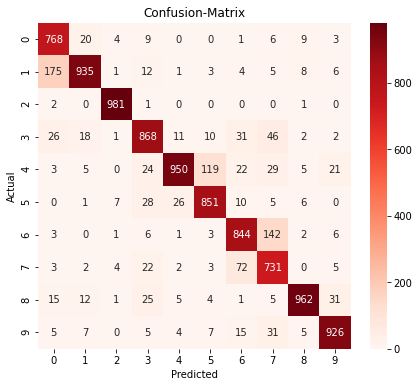

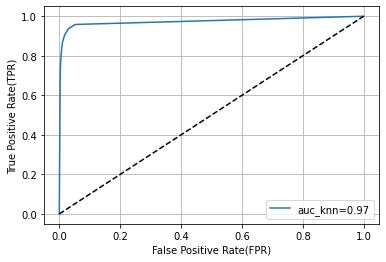

In [36]:
metrics(knn_train_accuracy_10,knn_preds_10,y_test,knn_proba_10)

train acuuracy: 0.9571333333333334
test acuuracy: 0.9075
Recall: 0.9075
Precision: 0.9111689055808048


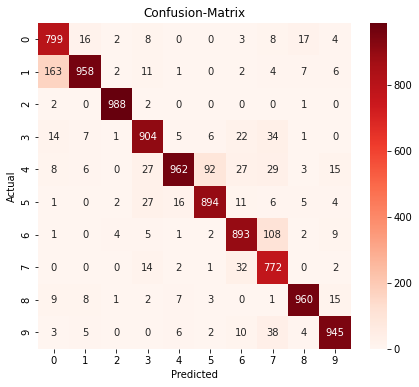

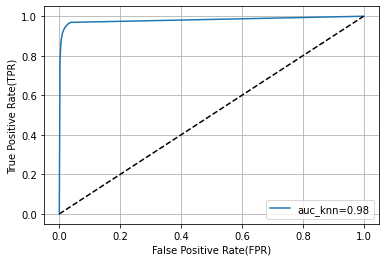

In [37]:
metrics(knn_train_accuracy_15,knn_preds_15,y_test,knn_proba_15)

train acuuracy: 0.9642
test acuuracy: 0.9215
Recall: 0.9215
Precision: 0.925231671110604


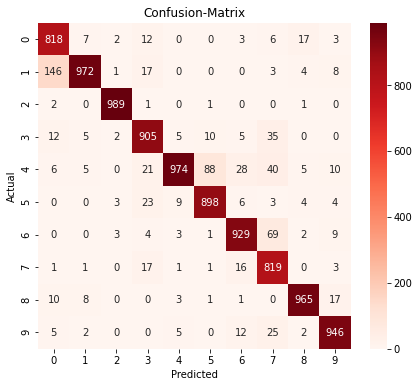

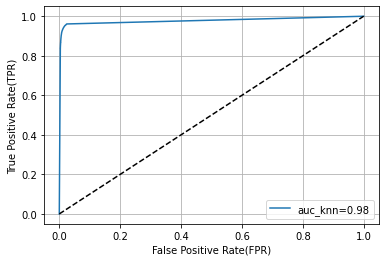

In [38]:
metrics(knn_train_accuracy_20,knn_preds_20,y_test,knn_proba_20)

train acuuracy: 0.9646666666666667
test acuuracy: 0.9188
Recall: 0.9188000000000001
Precision: 0.9235216935327891


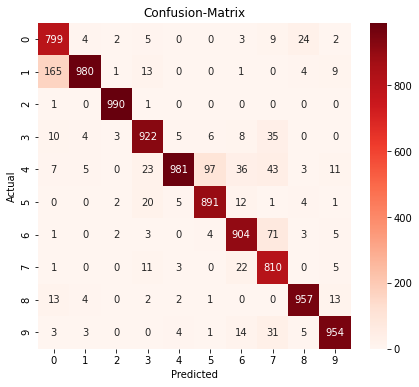

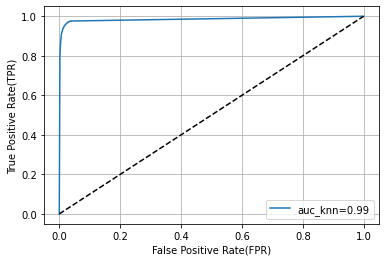

In [39]:
metrics(knn_train_accuracy_25,knn_preds_25,y_test,knn_proba_25)

train acuuracy: 0.9671666666666667
test acuuracy: 0.9276
Recall: 0.9275999999999998
Precision: 0.9309834364731584


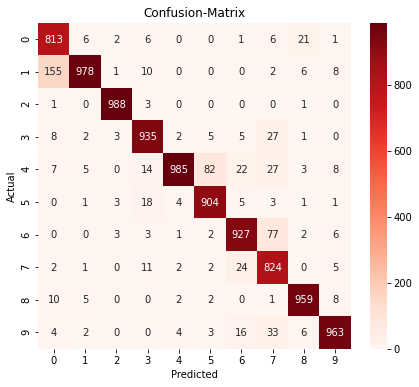

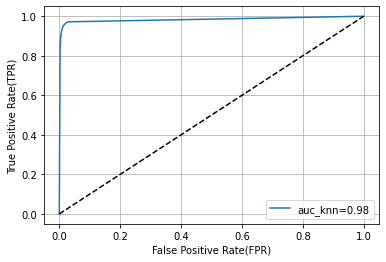

In [40]:
metrics(knn_train_accuracy_30,knn_preds_30,y_test,knn_proba_30)

In [12]:
metrics(dt_train_accuracy_10,dt_preds_10,y_test,dt_proba_10)

NameError: name 'metrics' is not defined

In [13]:
metrics(dt_train_accuracy_15,dt_preds_15,y_test,dt_proba_15)

NameError: name 'metrics' is not defined

In [14]:
metrics(dt_train_accuracy_25,dt_preds_25,y_test,dt_proba_25)

NameError: name 'metrics' is not defined

In [15]:
metrics(dt_train_accuracy_30,dt_preds_30,y_test,dt_proba_30)

NameError: name 'metrics' is not defined

train acuuracy: 0.9129166666666666
test acuuracy: 0.8435
Recall: 0.8435
Precision: 0.8451971478452333


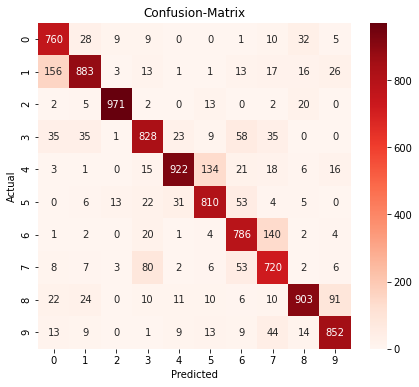

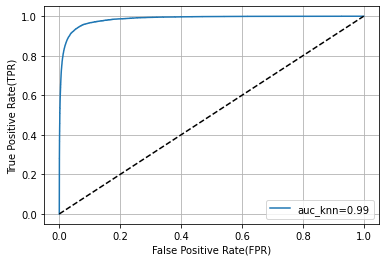

In [45]:
metrics(svm_train_accuracy_10,svm_preds_10,y_test,svm_proba_10)

train acuuracy: 0.9272166666666666
test acuuracy: 0.8637
Recall: 0.8637
Precision: 0.8658097467376524


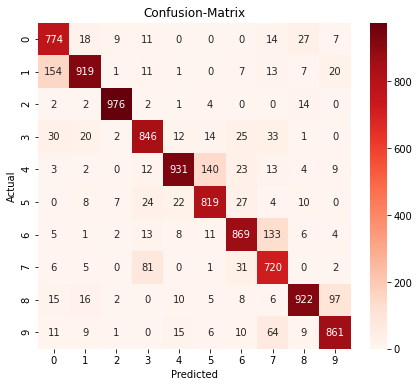

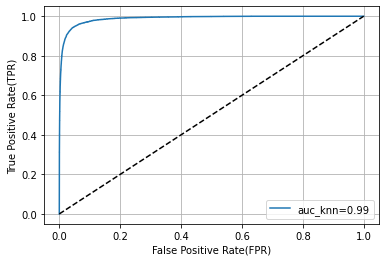

In [46]:
metrics(svm_train_accuracy_15,svm_preds_15,y_test,svm_proba_15)

train acuuracy: 0.9384
test acuuracy: 0.8791
Recall: 0.8790999999999999
Precision: 0.8811353066368767


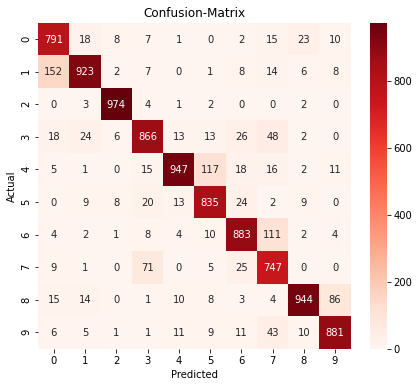

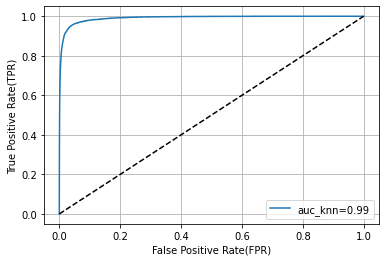

In [47]:
metrics(svm_train_accuracy_20,svm_preds_20,y_test,svm_proba_20)

train acuuracy: 0.9434333333333333
test acuuracy: 0.8884
Recall: 0.8884000000000001
Precision: 0.8896719496349738


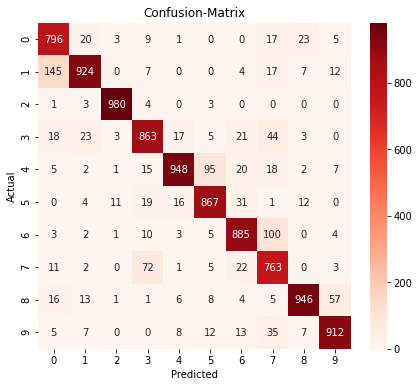

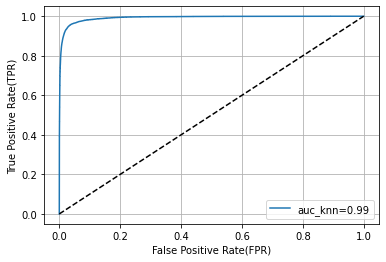

In [48]:
metrics(svm_train_accuracy_25,svm_preds_25,y_test,svm_proba_25)

train acuuracy: 0.9473166666666668
test acuuracy: 0.8928
Recall: 0.8928
Precision: 0.8947604455860304


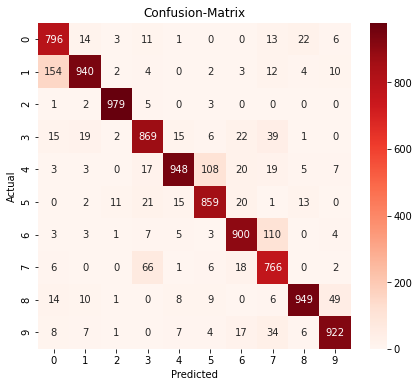

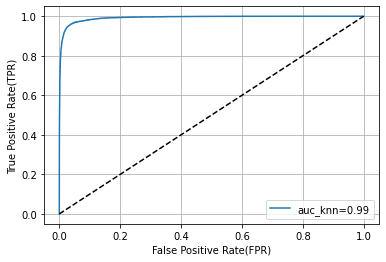

In [49]:
metrics(svm_train_accuracy_30,svm_preds_30,y_test,svm_proba_30)

train acuuracy: 0.9263666666666668
test acuuracy: 0.8595
Recall: 0.8594999999999999
Precision: 0.8623033385570279


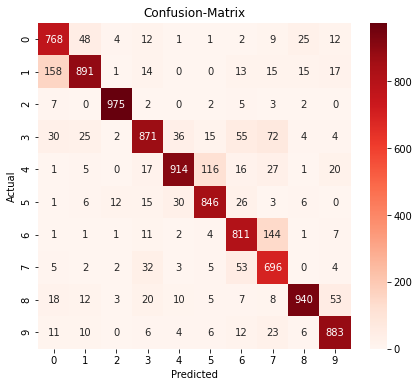

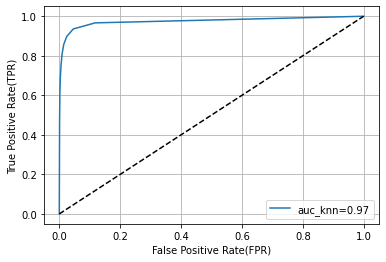

In [50]:
metrics(rf_train_accuracy_10,rf_preds_10,y_test,rf_proba_10)

train acuuracy: 0.9366166666666667
test acuuracy: 0.8665
Recall: 0.8664999999999999
Precision: 0.8693430128090561


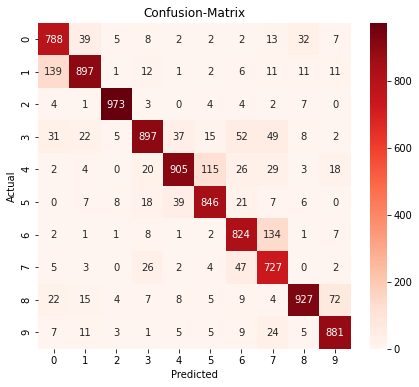

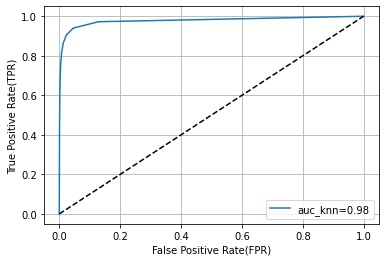

In [51]:
metrics(rf_train_accuracy_15,rf_preds_15,y_test,rf_proba_15)

train acuuracy: 0.9351333333333333
test acuuracy: 0.8732
Recall: 0.8732000000000001
Precision: 0.8759496767286713


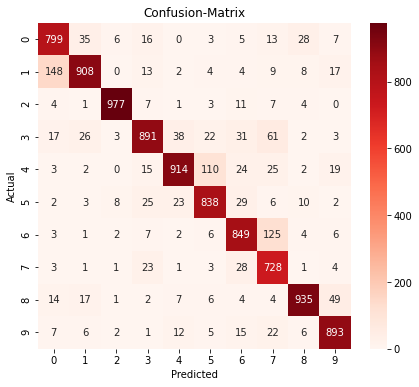

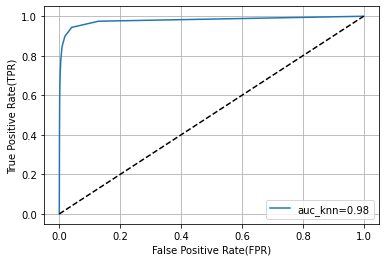

In [52]:
metrics(rf_train_accuracy_20,rf_preds_20,y_test,rf_proba_20)

train acuuracy: 0.9389
test acuuracy: 0.8811
Recall: 0.8811
Precision: 0.8842043751197354


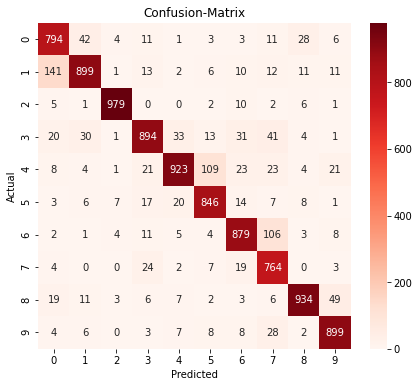

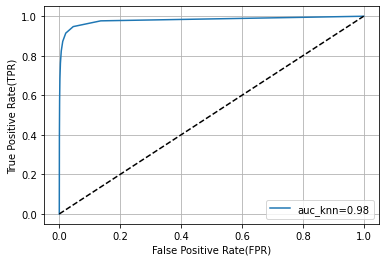

In [53]:
metrics(rf_train_accuracy_25,rf_preds_25,y_test,rf_proba_25)

train acuuracy: 0.9375166666666666
test acuuracy: 0.8767
Recall: 0.8766999999999999
Precision: 0.8788747855331425


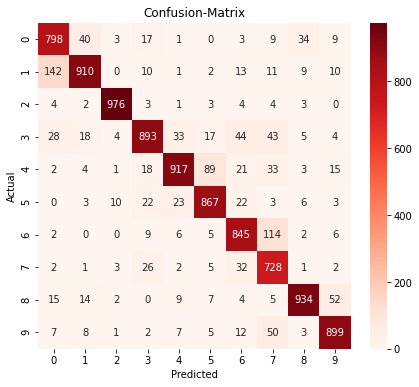

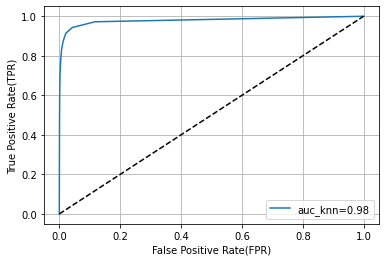

In [54]:
metrics(rf_train_accuracy_30,rf_preds_30,y_test,rf_proba_30)

train acuuracy: 0.8622
test acuuracy: 0.7723
Recall: 0.7723
Precision: 0.7794437934307021


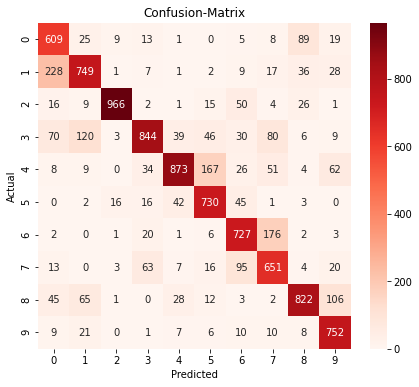

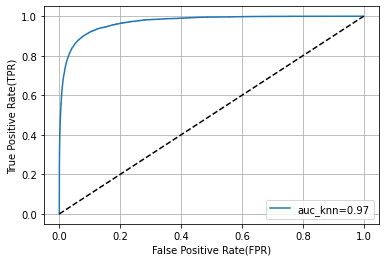

In [55]:
metrics(nb_train_accuracy_10,nb_preds_10,y_test,nb_proba_10)

train acuuracy: 0.8778
test acuuracy: 0.7835
Recall: 0.7835
Precision: 0.7882592450357353


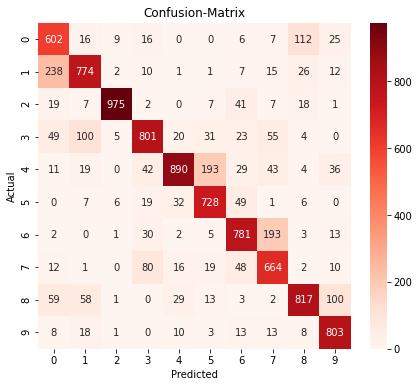

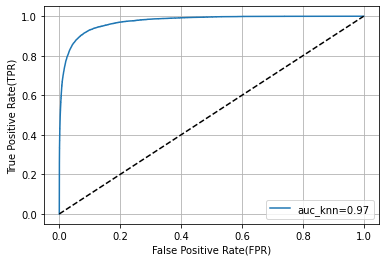

In [56]:
metrics(nb_train_accuracy_15,nb_preds_15,y_test,nb_proba_15)

train acuuracy: 0.8860333333333333
test acuuracy: 0.7954
Recall: 0.7954
Precision: 0.800059628464935


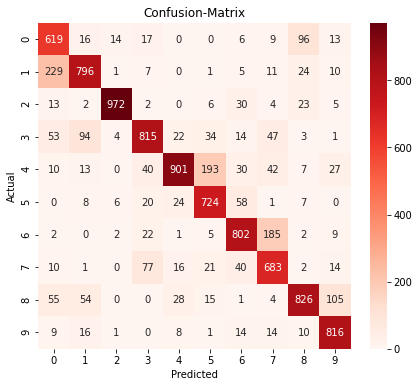

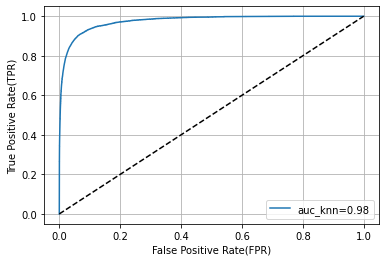

In [57]:
metrics(nb_train_accuracy_20,nb_preds_20,y_test,nb_proba_20)

train acuuracy: 0.8905166666666666
test acuuracy: 0.8009
Recall: 0.8009000000000001
Precision: 0.8059553882077269


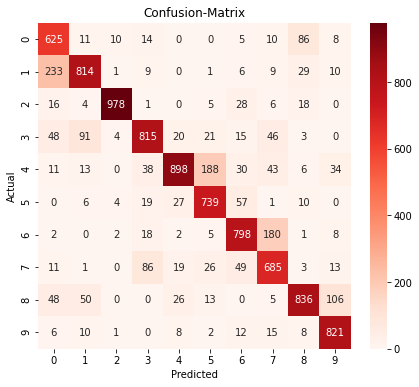

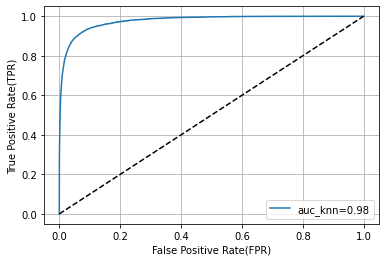

In [58]:
metrics(nb_train_accuracy_25,nb_preds_25,y_test,nb_proba_25)

train acuuracy: 0.8935000000000001
test acuuracy: 0.8131
Recall: 0.8130999999999998
Precision: 0.8161650442590831


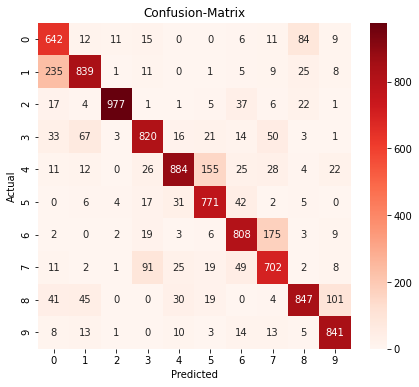

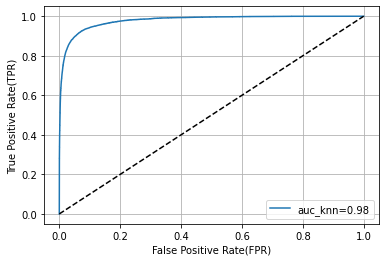

In [59]:
metrics(nb_train_accuracy_30,nb_preds_30,y_test,nb_proba_30)

# Performing Adaptive boosting to the best perfoming model
## Best model ---> Knn with 30 components(Cannot perform adaboost in knn as it doesnt supoort sample weights, hence apply adaboost to svm)

In [60]:
pca = PCA(n_components=30)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)

mm = MinMaxScaler()
mm.fit(x_train_pca)
x_train_pca_norm = mm.transform(x_train_pca)
x_train_pca_norm = pd.DataFrame(x_train_pca_norm)
x_test_pca_norm = mm.transform(x_test_pca)
x_test_pca_norm = pd.DataFrame(x_test_pca_norm)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
svm = SVC(probability=True)
ada = AdaBoostClassifier(estimator=svm)
skf = StratifiedKFold(n_splits = 5)
params={'n_estimators':[5,10], 
       'learning_rate' :[0.01,0.1]}
rcv = RandomizedSearchCV(ada,param_distributions=params,cv = skf, scoring='accuracy')
rcv.fit(x_train_pca_norm,y_train)

In [ ]:
rcv.best_params_

In [ ]:
rcv.best_score_